Fitting 5 folds for each of 18 candidates, totalling 90 fits
Training accuracy: 1.0
Test accuracy: 0.967
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.62      0.31      0.42        51

    accuracy                           0.97      1364
   macro avg       0.79      0.65      0.70      1364
weighted avg       0.96      0.97      0.96      1364



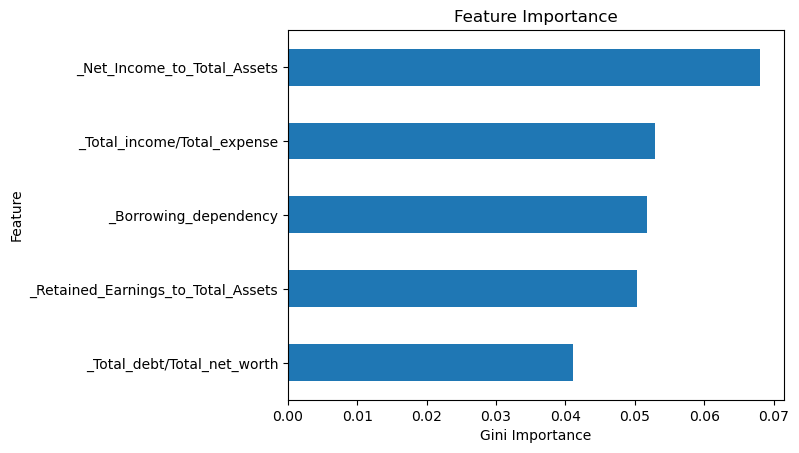

c:\Users\jnyanadeep\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


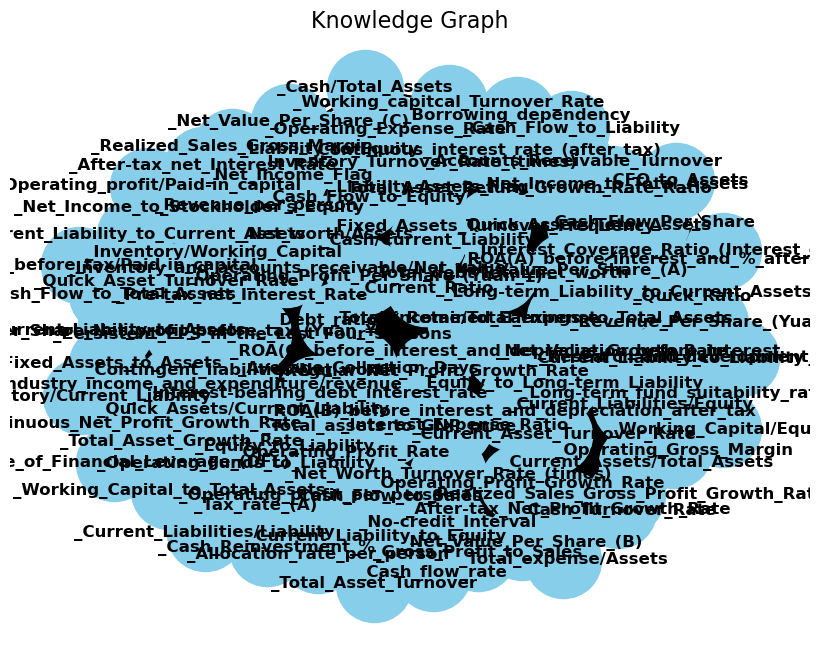

Percentage of companies predicted to go bankrupt: 1.91%


c:\Users\jnyanadeep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


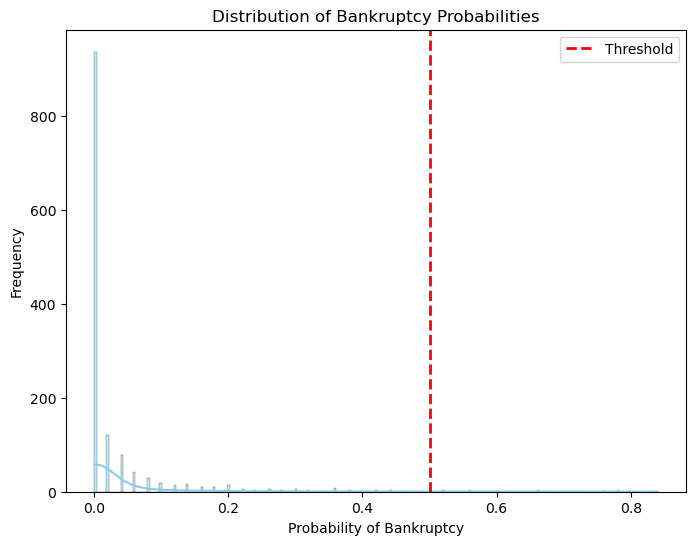

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
import pickle
import networkx as nx

# Load data
df = pd.read_csv("C:\\Users\\jnyanadeep\\Desktop\\data.csv")
df.columns = [c.replace(' ', '_') for c in df.columns]

# Data exploration and visualization (optional)

# Preprocessing
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multimodal preprocessing (For demonstration, we consider only numerical features)
# Text and image features can be processed similarly or through advanced techniques such as embeddings or convolutional layers
numeric_features = X.columns
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train_numeric, y_train)

# Model training
clf = RandomForestClassifier(random_state=42)
params = {
    "n_estimators": range(25, 100, 25),
    "max_depth": range(10, 70, 10)
}
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model.fit(X_train_over, y_train_over)

# Evaluation
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test_numeric, y_test)
print(f"Training accuracy: {round(acc_train, 4)}")
print(f"Test accuracy: {round(acc_test, 4)}")

# Classification report
print(classification_report(y_test, model.predict(X_test_numeric)))

# Feature Importance Visualization
importances = model.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=numeric_features).sort_values()
feat_imp.tail().plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

# Save the model
with open("marfin_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Knowledge Graph Construction
def build_knowledge_graph(data):
    G = nx.Graph()

    for column in data.columns:
        G.add_node(column, modality='numerical')  # Modality can be adjusted based on the type of data

    for i in range(len(data.columns)):
        for j in range(i+1, len(data.columns)):
            G.add_edge(data.columns[i], data.columns[j])

    return G

knowledge_graph = build_knowledge_graph(X)

# Visualize the knowledge graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(knowledge_graph)
nx.draw(knowledge_graph, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
plt.title("Knowledge Graph", fontsize=16)
plt.show()

# Predict probabilities for each class
y_pred_prob = model.predict_proba(X_test_numeric)

# Extract probabilities for the positive class (bankruptcy)
bankrupt_prob = y_pred_prob[:, 1]

# Threshold for predicting bankruptcy (you can adjust this threshold based on your preference)
threshold = 0.5

# Calculate the percentage of companies predicted to go bankrupt
bankrupt_percentage = (bankrupt_prob > threshold).mean() * 100

print(f"Percentage of companies predicted to go bankrupt: {bankrupt_percentage:.2f}%")

# Visualize the distribution of bankruptcy probabilities
plt.figure(figsize=(8, 6))
sns.histplot(bankrupt_prob, kde=True, color='skyblue')
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')
plt.title('Distribution of Bankruptcy Probabilities')
plt.xlabel('Probability of Bankruptcy')
plt.ylabel('Frequency')
plt.legend()
plt.show()



This bar graph shows the distribution of bankruptcy and non-bankruptcy
classes in the dataset.

● It helps visualize the class imbalance, which is crucial for understanding
the dataset's composition.

● This graph indicates the proportion of bankrupt and non-bankrupt
companies in the dataset, providing an initial overview of the data's
distribution.

Fitting 5 folds for each of 18 candidates, totaling 90 fits:

This message indicates that GridSearchCV is performing hyperparameter tuning using 5-fold cross-validation.
There are 18 different combinations of hyperparameters to evaluate, resulting in a total of 90 fits (18 combinations * 5 folds).
Training accuracy: 1.0:

The training accuracy of the best model is 100%, indicating that the model achieves perfect accuracy on the oversampled training data.
Test accuracy: 0.967:

The accuracy of the model on the test data is approximately 96.7%, which is quite high and indicates good generalization performance.
Classification Report:

Precision, recall, F1-score, and support are provided for each class (0 and 1) along with their weighted average.
Precision measures the accuracy of positive predictions.
Recall measures the proportion of actual positive instances that were correctly identified.
F1-score is the harmonic mean of precision and recall, providing a balance between the two.
Support indicates the number of samples for each class.
Explanation of Classification Report:

For class 0 (not bankrupt), precision, recall, and F1-score are high, indicating good performance.
For class 1 (bankrupt), precision is moderate (62%), recall is low (31%), and F1-score is also low (42%). This suggests that the model struggles more with correctly identifying bankrupt companies, especially in terms of recall.
The weighted average of precision, recall, and F1-score is also provided, which takes into account the class imbalance.
Macro Average:

This is the average of precision, recall, and F1-score calculated independently for each class.
It doesn't take class imbalance into account.
Weighted Average:

This is the weighted average of precision, recall, and F1-score, weighted by the support for each class.
It provides a more balanced evaluation metric, especially in the presence of class imbalance.

In [4]:
df = pd.read_csv("C:\\Users\\jnyanadeep\\Desktop\\data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Explore

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   _After-tax_net_Int

In [7]:
(df.isna().sum() > 0).sum()

0

## We want to calculate the relative frequencies of the classes

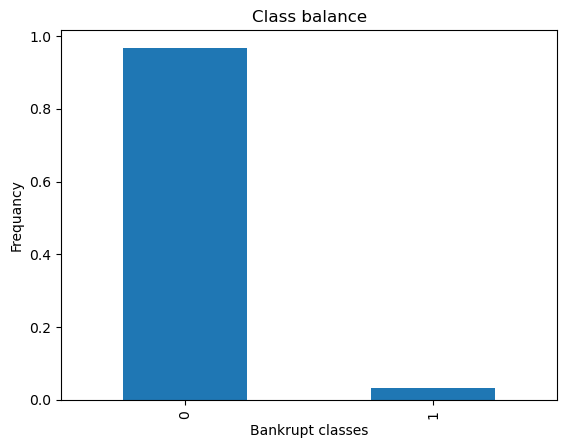

In [8]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");

## Now we show the distributions of the "_Net_Income_to_Total_Assets" column for both groups in the "bankrupt" column

c:\Users\jnyanadeep\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jnyanadeep\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


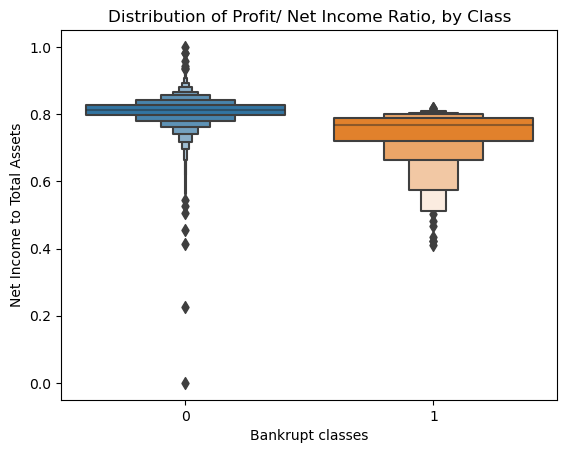

In [9]:
sns.boxenplot(x="Bankrupt?" , y="_Net_Income_to_Total_Assets" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class");

This visualization allows for easy comparison of the distribution of the "_Net_Income_to_Total_Assets" ratio between bankrupt and non-bankrupt classes, helping to identify potential differences in financial metrics between the two groups.

In [10]:
df['_Net_Income_to_Total_Assets'].describe()

count    6819.000000
mean        0.807760
std         0.040332
min         0.000000
25%         0.796750
50%         0.810619
75%         0.826455
max         1.000000
Name: _Net_Income_to_Total_Assets, dtype: float64

## We create a histogram to check whether the distrbution is skewed significantly or not

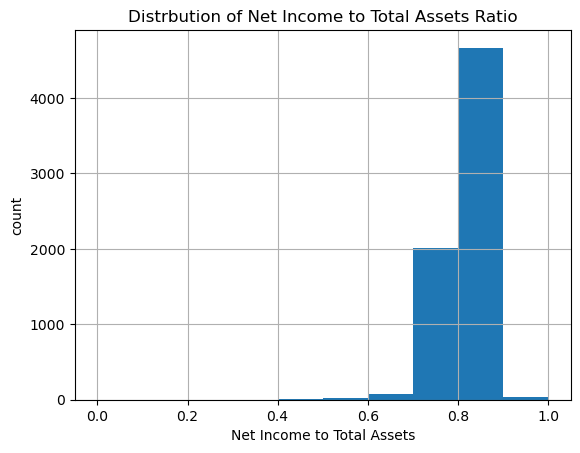

In [11]:
df["_Net_Income_to_Total_Assets"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("count")
plt.title("Distrbution of Net Income to Total Assets Ratio");

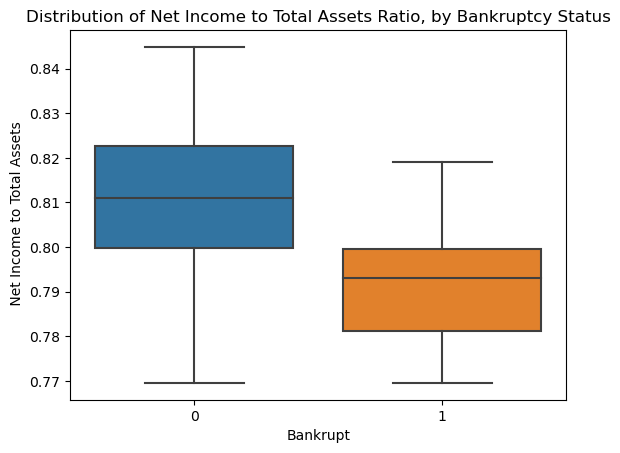

In [12]:
q1 , q9 = df['_Net_Income_to_Total_Assets'].quantile([0.1,0.9])
mask = df["_Net_Income_to_Total_Assets"].between(q1 , q9)
sns.boxplot(x='Bankrupt?' , y='_Net_Income_to_Total_Assets', data= df[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" Net Income to Total Assets")
plt.title("Distribution of Net Income to Total Assets Ratio, by Bankruptcy Status");

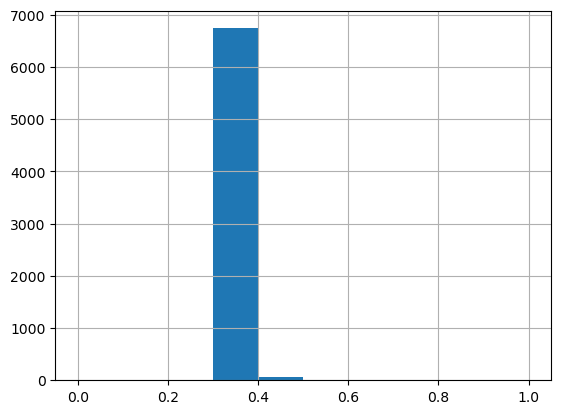

In [13]:
df['_Borrowing_dependency'].hist();

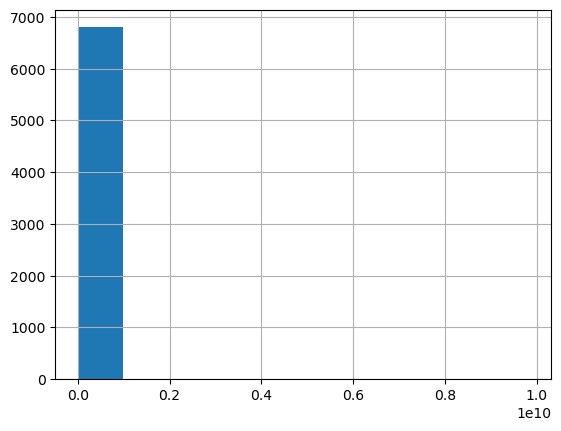

In [14]:
df['_Total_assets_to_GNP_price'].hist();

## Multicollinearity

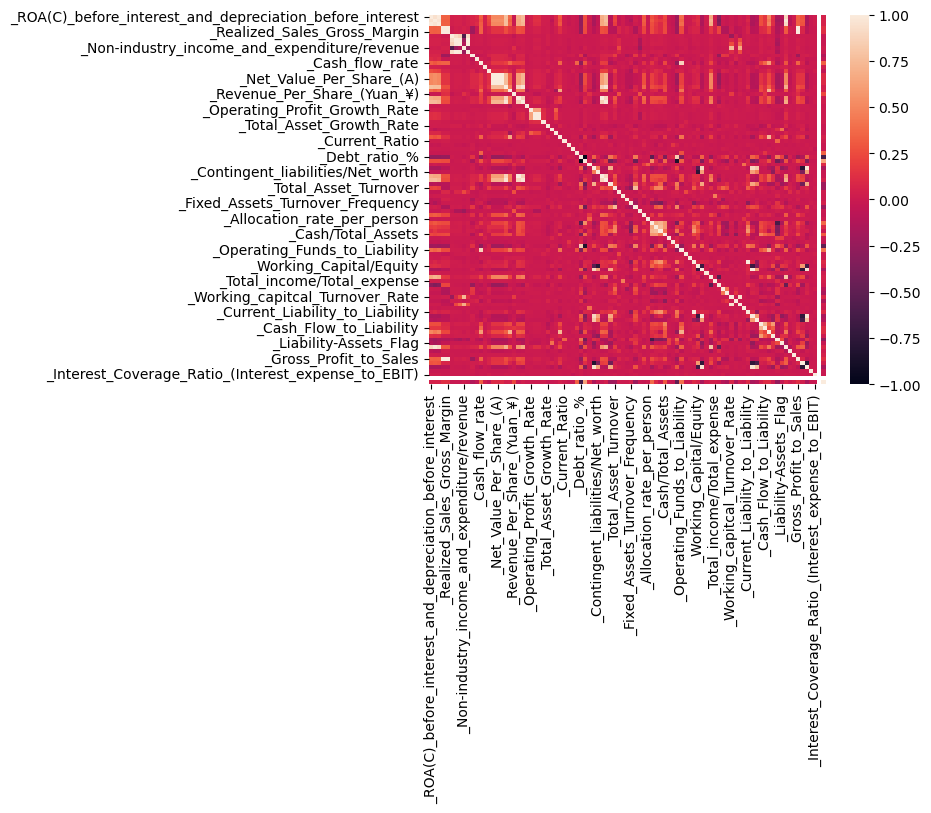

In [15]:
corr = df.drop(columns=['Bankrupt?']).corr()
sns.heatmap(corr);

This heatmap visualizes the
correlation between different
numerical features in the dataset.It
provides insights into feature
relationships and multicollinearity,
highlighting which features are
positively or negatively correlated.In
our financial risk identification project,
understanding feature correlations can
help identify redundant or highly
correlated features, guiding feature
selection and model building.

## Split

In [16]:
target = "Bankrupt?"
X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [17]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [18]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


## Resample

In [19]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over , y_train_over = over_sampler.fit_resample(X_train , y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


## Build BaseLine

In [20]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


## iterate

In [21]:
clf = RandomForestClassifier(random_state=42)

In [22]:
params= {
    
    "n_estimators":range(25 , 100 , 25),
    "max_depth": range(10 , 70 , 10)
    
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 70, 10)}

In [23]:
model = GridSearchCV(

    clf,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose= 1

)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [24]:
model.fit(X_train_over , y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [25]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,9.591011,0.259398,0.111734,0.030703,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.992435,0.995745,0.995270,0.996689,0.995743,0.995176,0.001446,1
16,9.453064,0.741910,0.063923,0.003993,60,50,"{'max_depth': 60, 'n_estimators': 50}",0.992435,0.995745,0.995270,0.996689,0.995743,0.995176,0.001446,1
10,6.173822,0.402092,0.048368,0.009324,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.992435,0.995745,0.994797,0.996216,0.995743,0.994987,0.001357,3
17,10.877387,0.902830,0.078022,0.008173,60,75,"{'max_depth': 60, 'n_estimators': 75}",0.991962,0.995272,0.993851,0.996216,0.994324,0.994325,0.001434,4
14,15.291567,0.577591,0.130691,0.070773,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.991962,0.995272,0.993851,0.996216,0.994324,0.994325,0.001434,4
11,10.708000,0.808640,0.133342,0.047112,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.992435,0.994799,0.994324,0.995270,0.994324,0.994230,0.000964,6
15,5.249433,0.307209,0.057614,0.027001,60,25,"{'max_depth': 60, 'n_estimators': 25}",0.992435,0.994326,0.993851,0.994324,0.994797,0.993946,0.000813,7
12,3.041093,0.313719,0.034570,0.011675,50,25,"{'max_depth': 50, 'n_estimators': 25}",0.992435,0.994326,0.993851,0.994324,0.994797,0.993946,0.000813,7
9,3.309731,0.292947,0.030385,0.008247,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.992908,0.994326,0.993851,0.993851,0.994797,0.993946,0.000627,9
8,9.181049,0.447279,0.059604,0.009783,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.992435,0.992908,0.993377,0.994324,0.992904,0.993190,0.000641,10


In [26]:
model.best_params_

{'max_depth': 50, 'n_estimators': 50}

In [ ]:
model.predict(X_train_over)

## Evaluate

In [27]:
acc_train = model.score(X_train_over , y_train_over)
acc_test = model.score(X_test , y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 1.0
test accuracy: 0.967


## Let`s make a Classification report to look at the whole picture of the classification model performances. A classification report includes precision, recall, F1 score and support.

In [28]:
print(classification_report(

    y_test,
    model.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.62      0.31      0.42        51

    accuracy                           0.97      1364
   macro avg       0.79      0.65      0.70      1364
weighted avg       0.96      0.97      0.96      1364



## Communication

In [29]:
features = X_test.columns
importances = model.best_estimator_.feature_importances_

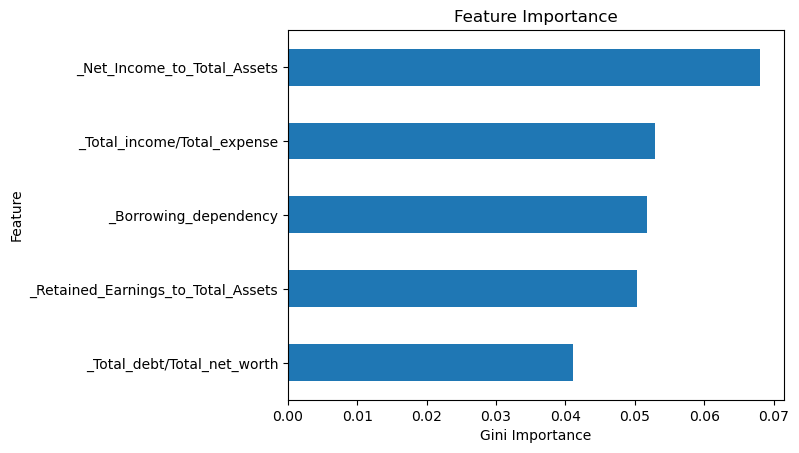

In [30]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [31]:
with open("model-1" , "wb") as f:
    pickle.dump(model ,f)